In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# !pip install pandas
# !pip install seaborn

### Descrição dos dados


**num_boletim**: Número do Boletim de Ocorrência, exemplo: 206099 ou 2016-000009920-001

**data_boletim**: Data do acidente registrada no Boletim de Ocorrência, exemplo: 24/4/1999

**hora_boletim**: Hora do acidente registrada no Boletim de Ocorrência, exemplo: 18:10:00

**N_envolvido**: Número do envolvido no acidente, exemplo: 1 - Paulo Sergio da Silva, 2 - Lorival Oliveira Franco.

**condutor**: Indica se o envolvido no acidente é condutor ou não. Valores possiveis: 'S'- sim, 'N' - Nao e 0 - Não informado.

**cod_severidade**: Codigo da severidade. Exemplo: 0 - não informado, 1 - não fatal, 2 - fatal, 3 - sem ferimentos.

**desc_severidade**: Descrição da severidade.

**sexo**: Sexo do envolvido. Valores possíveis: M-Masculino, F-Feminino e 0-Não informado.

**cinto_seguranca**: Indica se o envolvido no acidente estava usando o cinto de segurança.

**Embreagues**: Indica se o envolvido no acidente estava embriagado.

**Idade**: Idade do envolvido. Exemplo: 26.

**nascimento**: Data de nascimento do envolvido. Exemplo: 14/11/1974.

**categoria_habilitacao**: Codigo da categoria de habilitacao. Exemplo: IN - Inabilitado, N - Nao informado, B - veiculos motor, com ate 8 passageiros, peso 
maximo 3500 kg, C - veic. motor p/ transp. de carga, c/ peso max. aut. 3500 kg.
**descricao_habilitacao**: Calculado a partir do valor de "categoria_habilitacao".

**declaracao_obito**: Número da declaração de óbito.

**cod_severidade_antiga**: Código da severidade antiga. Exemplo: 0 - nao informado, 1 - nao fatal, 2 - fatal, 3 - sem ferimentos.

**especie_veiculo**: Descrição do código da especie do veículo. Exemplos: 1 - bicicleta, 2 - ciclomotor, 3 - motoneta, 4 - motocicleta, 5 - triciclo, 6 - 
automóvel.
**pedestre**:Indicativo de Pedestre (para os acidentes a partir de 2015). Exemplo: 0 - nao informado, S - Sim, N - Nao.

**passageiro**: Indicativo de Passageiro. Exemplo: 0 - nao informado, S - Sim, N - Nao.


In [16]:
# new_file = open('new_detran2.csv', "r+")
# with open('./teste.csv', encoding='utf-8') as file: 
#     for i in file:
# #         print(i.replace(",", ";"))
#         new_file.write(i.replace(";", ","))
    
# new_file.close()


df_2018 = pd.read_csv('new_detran_2018.csv')
# df_2018.head()

df_2021 = pd.read_csv('new_detran_2021.csv')
# df_2021.head()

,n_boletim,data_boletim,hora_boletim,n_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,pedestre,passageiro
0,2018-032919856-001,10/07/2018,13:00,1,S,1,NAO FATAL,M,SIM,NAO,36,18/08/1981,AD,HABILITADO NAS CATEGORIAS A e D ...,0,0,MOTOCICLETA,N,N
1,2018-032927339-001,25/07/2018,06:40,1,S,1,NAO FATAL,F,SIM,NAO,31,14/02/1987,N,NAO INFORMADO ...,0,0,MOTOCICLETA,N,N
2,2018-032930555-001,26/07/2018,12:23,1,S,3,SEM FERIMENTOS,M,SIM,NAO,30,18/04/1988,AD,HABILITADO NAS CATEGORIAS A e D ...,0,0,AUTOMOVEL,N,N
3,2018-032930555-001,26/07/2018,12:23,2,S,1,NAO FATAL,M,SIM,NAO,32,15/11/1985,AD,HABILITADO NAS CATEGORIAS A e D ...,0,0,MOTOCICLETA,N,N
4,2018-032939922-001,25/07/2018,18:40,1,N,1,NAO FATAL,F,NAO,NAO,37,05/06/1981,,...,0,0,,S,N


## Histograma

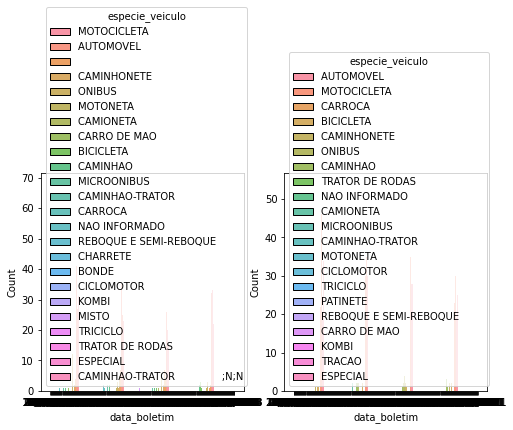

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
sns.histplot(data=df_2018, bins=10, x='data_boletim', hue='especie_veiculo', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df_2021, bins=10, x='data_boletim', hue='especie_veiculo', multiple='dodge', shrink=0.8,ax=axes[1])
plt.show()